In [1]:
import torch
import matplotlib.pyplot as plt

In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [4]:
x_train.shape, y_train.shape

(torch.Size([12, 1]), torch.Size([12, 1]))

In [6]:
# Weight, Biase Define
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

In [7]:
W

tensor([[0.]])

In [8]:
# 반복횟수 설정
## Weight, Bias 학습 되도록 진행
for epochs in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    hypothesis = torch.sigmoid(torch.mm(x_train,W) + b)
    
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1-y_train)*torch.log(1-hypothesis))

    cost.backward()
    
    with torch.no_grad() as grd:
        W = W - lr*W.grad
        b = b - lr*b.grad
    
    if epochs % 100 == 0:
        print('epoch: {} cost: {:.6f} W: {:.6f} b: {:.6f}'.format(epochs,cost.item(),W.squeeze(),b.squeeze()))

epoch: 0 cost: 0.693147 W: -0.154167 b: 0.083333
epoch: 100 cost: 0.420221 W: -1.451281 b: 4.406926
epoch: 200 cost: 0.398721 W: -1.898433 b: 5.773751
epoch: 300 cost: 0.390820 W: -2.174323 b: 6.609556
epoch: 400 cost: 0.387009 W: -2.367329 b: 7.191601
epoch: 500 cost: 0.384924 W: -2.510626 b: 7.622530
epoch: 600 cost: 0.383699 W: -2.620779 b: 7.953165
epoch: 700 cost: 0.382944 W: -2.707397 b: 8.212804
epoch: 800 cost: 0.382463 W: -2.776597 b: 8.420023
epoch: 900 cost: 0.382149 W: -2.832521 b: 8.587361
epoch: 1000 cost: 0.381941 W: -2.878112 b: 8.723699
epoch: 1100 cost: 0.381802 W: -2.915530 b: 8.835540
epoch: 1200 cost: 0.381706 W: -2.946401 b: 8.927778
epoch: 1300 cost: 0.381641 W: -2.971979 b: 9.004180
epoch: 1400 cost: 0.381596 W: -2.993240 b: 9.067668
epoch: 1500 cost: 0.381565 W: -3.010967 b: 9.120595
epoch: 1600 cost: 0.381543 W: -3.025776 b: 9.164800
epoch: 1700 cost: 0.381527 W: -3.038171 b: 9.201794
epoch: 1800 cost: 0.381517 W: -3.048560 b: 9.232798
epoch: 1900 cost: 0.3815

In [5]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test,W)+b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


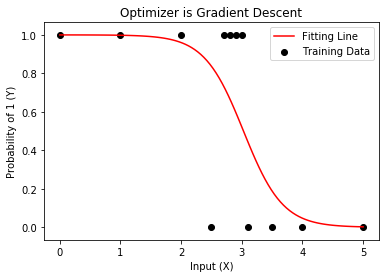

In [6]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train,y_train, c = 'black', label = 'Training Data')

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y, c = 'red', label = 'Fitting Line')

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Optimizer is Gradient Descent")
plt.legend()

# SGD Optimizer

In [7]:
# Weight, Bias 초기화
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0
optimizer = torch.optim.SGD([W,b],lr=1.0)

# 반복횟수 설정
## Weight, Bias 학습 되도록 진행
for epochs in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    hypothesis = torch.sigmoid(torch.mm(x_train,W) + b)
    
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1-y_train)*torch.log(1-hypothesis))

#     cost.backward()
    
#     with torch.no_grad() as grd:
#         W = W - lr*W.grad
#         b = b - lr*b.grad
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epochs % 100 == 0:
        print('epoch: {} cost: {:.6f} W: {:.6f} b: {:.6f}'.format(epochs,cost.item(),W.squeeze(),b.squeeze()))

epoch: 0 cost: 0.693147 W: -0.154167 b: 0.083333
epoch: 100 cost: 0.420221 W: -1.451281 b: 4.406926
epoch: 200 cost: 0.398721 W: -1.898433 b: 5.773751
epoch: 300 cost: 0.390820 W: -2.174323 b: 6.609556
epoch: 400 cost: 0.387009 W: -2.367329 b: 7.191601
epoch: 500 cost: 0.384924 W: -2.510626 b: 7.622530
epoch: 600 cost: 0.383699 W: -2.620779 b: 7.953165
epoch: 700 cost: 0.382944 W: -2.707397 b: 8.212804
epoch: 800 cost: 0.382463 W: -2.776597 b: 8.420023
epoch: 900 cost: 0.382149 W: -2.832521 b: 8.587361
epoch: 1000 cost: 0.381941 W: -2.878112 b: 8.723699
epoch: 1100 cost: 0.381802 W: -2.915530 b: 8.835540
epoch: 1200 cost: 0.381706 W: -2.946401 b: 8.927778
epoch: 1300 cost: 0.381641 W: -2.971979 b: 9.004180
epoch: 1400 cost: 0.381596 W: -2.993240 b: 9.067668
epoch: 1500 cost: 0.381565 W: -3.010967 b: 9.120595
epoch: 1600 cost: 0.381543 W: -3.025776 b: 9.164800
epoch: 1700 cost: 0.381527 W: -3.038171 b: 9.201794
epoch: 1800 cost: 0.381517 W: -3.048560 b: 9.232798
epoch: 1900 cost: 0.3815

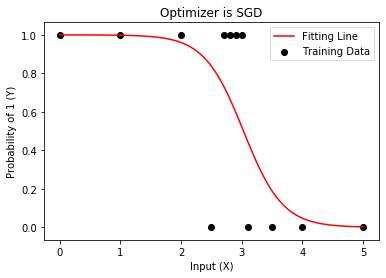

In [8]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train,y_train, c = 'black', label = 'Training Data')

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y, c = 'red', label = 'Fitting Line')

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Optimizer is SGD")
plt.legend()

# Adam

In [9]:
# Weight, Bias 초기화
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0
optimizer = torch.optim.Adam([W,b],lr=1.0)

# 반복횟수 설정
## Weight, Bias 학습 되도록 진행
for epochs in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    hypothesis = torch.sigmoid(torch.mm(x_train,W) + b)
    
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1-y_train)*torch.log(1-hypothesis))

#     cost.backward()
    
#     with torch.no_grad() as grd:
#         W = W - lr*W.grad
#         b = b - lr*b.grad
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epochs % 100 == 0:
        print('epoch: {} cost: {:.6f} W: {:.6f} b: {:.6f}'.format(epochs,cost.item(),W.squeeze(),b.squeeze()))

epoch: 0 cost: 0.693147 W: -0.999998 b: 0.999996
epoch: 100 cost: 0.381568 W: -3.009526 b: 9.125642
epoch: 200 cost: 0.381491 W: -3.102716 b: 9.394312
epoch: 300 cost: 0.381491 W: -3.103856 b: 9.397763
epoch: 400 cost: 0.381491 W: -3.103852 b: 9.397749
epoch: 500 cost: 0.381491 W: -3.103851 b: 9.397749
epoch: 600 cost: 0.381491 W: -3.103851 b: 9.397749
epoch: 700 cost: 0.381491 W: -3.103852 b: 9.397750
epoch: 800 cost: 0.381491 W: -3.103852 b: 9.397752
epoch: 900 cost: 0.381491 W: -3.103853 b: 9.397750
epoch: 1000 cost: 0.381491 W: -3.103852 b: 9.397751
epoch: 1100 cost: 0.381491 W: -3.103852 b: 9.397751
epoch: 1200 cost: 0.381491 W: -3.103851 b: 9.397750
epoch: 1300 cost: 0.381491 W: -3.103854 b: 9.397749
epoch: 1400 cost: 0.381552 W: -3.096524 b: 9.382556
epoch: 1500 cost: 0.381491 W: -3.103856 b: 9.397751
epoch: 1600 cost: 0.386735 W: -3.116000 b: 9.649760
epoch: 1700 cost: 0.381491 W: -3.103549 b: 9.398109
epoch: 1800 cost: 0.382028 W: -3.134097 b: 9.368782
epoch: 1900 cost: 0.3814

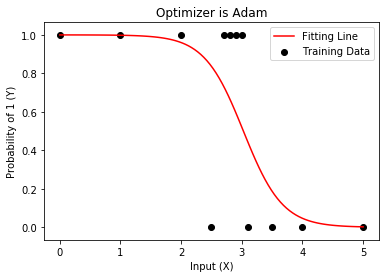

In [10]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train,y_train, c = 'black', label = 'Training Data')

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y, c = 'red', label = 'Fitting Line')

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Optimizer is Adam")
plt.legend()

# Adadelta

In [11]:
# Weight, Bias 초기화
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0
optimizer = torch.optim.Adadelta([W,b],lr=1.0)

# 반복횟수 설정
## Weight, Bias 학습 되도록 진행
for epochs in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    hypothesis = torch.sigmoid(torch.mm(x_train,W) + b)
    
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1-y_train)*torch.log(1-hypothesis))

#     cost.backward()
    
#     with torch.no_grad() as grd:
#         W = W - lr*W.grad
#         b = b - lr*b.grad
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epochs % 100 == 0:
        print('epoch: {} cost: {:.6f} W: {:.6f} b: {:.6f}'.format(epochs,cost.item(),W.squeeze(),b.squeeze()))

epoch: 0 cost: 0.693147 W: -0.003162 b: 0.003160
epoch: 100 cost: 0.632085 W: -0.202549 b: 0.469101
epoch: 200 cost: 0.579402 W: -0.372944 b: 0.996084
epoch: 300 cost: 0.537192 W: -0.537830 b: 1.522116
epoch: 400 cost: 0.504296 W: -0.698524 b: 2.036054
epoch: 500 cost: 0.478509 W: -0.857097 b: 2.540156
epoch: 600 cost: 0.458038 W: -1.015019 b: 3.038626
epoch: 700 cost: 0.441618 W: -1.173148 b: 3.534263
epoch: 800 cost: 0.428366 W: -1.331804 b: 4.028254
epoch: 900 cost: 0.417649 W: -1.490835 b: 4.520365
epoch: 1000 cost: 0.409003 W: -1.649657 b: 5.009084
epoch: 1100 cost: 0.402074 W: -1.807266 b: 5.491660
epoch: 1200 cost: 0.396584 W: -1.962220 b: 5.964028
epoch: 1300 cost: 0.392307 W: -2.112598 b: 6.420692
epoch: 1400 cost: 0.389052 W: -2.255959 b: 6.854595
epoch: 1500 cost: 0.386648 W: -2.389365 b: 7.257201
epoch: 1600 cost: 0.384936 W: -2.509623 b: 7.619217
epoch: 1700 cost: 0.383766 W: -2.613942 b: 7.932579
epoch: 1800 cost: 0.382993 W: -2.701013 b: 8.193676
epoch: 1900 cost: 0.3824

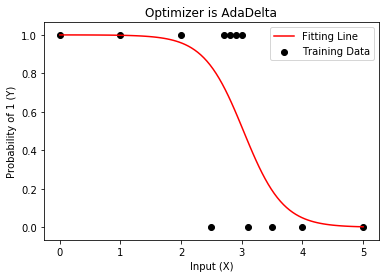

In [12]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train,y_train, c = 'black', label = 'Training Data')

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y, c = 'red', label = 'Fitting Line')

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Optimizer is AdaDelta")
plt.legend()

# Adagrad

In [13]:
# Weight, Bias 초기화
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0
optimizer = torch.optim.Adagrad([W,b],lr=1.0)

# 반복횟수 설정
## Weight, Bias 학습 되도록 진행
for epochs in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    hypothesis = torch.sigmoid(torch.mm(x_train,W) + b)
    
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1-y_train)*torch.log(1-hypothesis))

#     cost.backward()
    
#     with torch.no_grad() as grd:
#         W = W - lr*W.grad
#         b = b - lr*b.grad
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epochs % 100 == 0:
        print('epoch: {} cost: {:.6f} W: {:.6f} b: {:.6f}'.format(epochs,cost.item(),W.squeeze(),b.squeeze()))

epoch: 0 cost: 0.693147 W: -1.000000 b: 1.000000
epoch: 100 cost: 0.405247 W: -1.730439 b: 5.273878
epoch: 200 cost: 0.390935 W: -2.168449 b: 6.598612
epoch: 300 cost: 0.386055 W: -2.427320 b: 7.376696
epoch: 400 cost: 0.383900 W: -2.600170 b: 7.894600
epoch: 500 cost: 0.382828 W: -2.722402 b: 8.260150
epoch: 600 cost: 0.382257 W: -2.811744 b: 8.527007
epoch: 700 cost: 0.381939 W: -2.878444 b: 8.726061
epoch: 800 cost: 0.381757 W: -2.928960 b: 8.876721
epoch: 900 cost: 0.381651 W: -2.967609 b: 8.991940
epoch: 1000 cost: 0.381588 W: -2.997399 b: 9.080716
epoch: 1100 cost: 0.381550 W: -3.020485 b: 9.149499
epoch: 1200 cost: 0.381527 W: -3.038451 b: 9.203014
epoch: 1300 cost: 0.381513 W: -3.052476 b: 9.244785
epoch: 1400 cost: 0.381505 W: -3.063454 b: 9.277475
epoch: 1500 cost: 0.381499 W: -3.072060 b: 9.303102
epoch: 1600 cost: 0.381496 W: -3.078816 b: 9.323219
epoch: 1700 cost: 0.381494 W: -3.084127 b: 9.339031
epoch: 1800 cost: 0.381493 W: -3.088304 b: 9.351467
epoch: 1900 cost: 0.3814

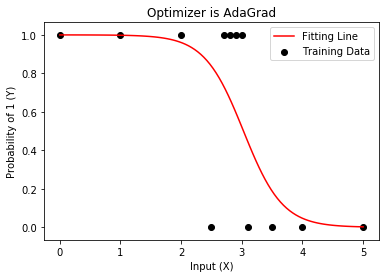

In [14]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train,y_train, c = 'black', label = 'Training Data')

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y, c = 'red', label = 'Fitting Line')

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Optimizer is AdaGrad")
plt.legend()

# RMSProp

* 학습이 되지 않아 learning rate의 값을 0.1로 수정 

In [15]:
# Weight, Bias 초기화
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0
optimizer = torch.optim.RMSprop([W,b],lr=0.1)

# 반복횟수 설정
## Weight, Bias 학습 되도록 진행
for epochs in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    hypothesis = torch.sigmoid(torch.mm(x_train,W) + b)
    
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1-y_train)*torch.log(1-hypothesis))

#     cost.backward()
    
#     with torch.no_grad() as grd:
#         W = W - lr*W.grad
#         b = b - lr*b.grad
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epochs % 100 == 0:
        print('epoch: {} cost: {:.6f} W: {:.6f} b: {:.6f}'.format(epochs,cost.item(),W.squeeze(),b.squeeze()))

epoch: 0 cost: 0.693147 W: -0.999999 b: 0.999999
epoch: 100 cost: 0.399307 W: -1.883651 b: 5.738459
epoch: 200 cost: 0.386402 W: -2.471035 b: 7.612029
epoch: 300 cost: 0.382497 W: -2.771450 b: 8.430706
epoch: 400 cost: 0.382283 W: -2.909659 b: 8.909251
epoch: 500 cost: 0.382965 W: -2.978191 b: 9.176059
epoch: 600 cost: 0.384287 W: -3.010484 b: 9.333098
epoch: 700 cost: 0.384263 W: -3.038833 b: 9.412768
epoch: 800 cost: 0.383891 W: -3.057576 b: 9.454795
epoch: 900 cost: 0.383915 W: -3.065763 b: 9.481153
epoch: 1000 cost: 0.383994 W: -3.069999 b: 9.496862
epoch: 1100 cost: 0.383986 W: -3.073012 b: 9.505312
epoch: 1200 cost: 0.383970 W: -3.074806 b: 9.510058
epoch: 1300 cost: 0.383974 W: -3.075701 b: 9.512912
epoch: 1400 cost: 0.383977 W: -3.076213 b: 9.514558
epoch: 1500 cost: 0.383977 W: -3.076533 b: 9.515476
epoch: 1600 cost: 0.383976 W: -3.076716 b: 9.515999
epoch: 1700 cost: 0.383976 W: -3.076816 b: 9.516308
epoch: 1800 cost: 0.383977 W: -3.076873 b: 9.516488
epoch: 1900 cost: 0.3839

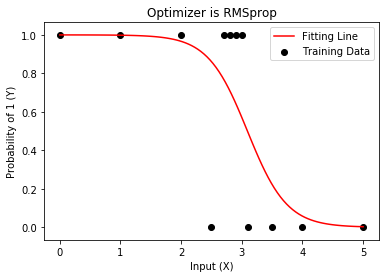

In [16]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train,y_train, c = 'black', label = 'Training Data')

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y, c = 'red', label = 'Fitting Line')

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Optimizer is RMSprop")
plt.legend()